# &AElig;co
# Visualization Example 

✈️♻️

This code is part of the Master's Thesis "Streamlined Life Cycle Assessment Method for Aircraft Eco-Design", by Giácomo Parolin.

``Please enter the following information:``

In [24]:
import os
os.chdir("C:/Users/giparoli/Documents/Projetos/AEco")

iris_path = '.\\Outputs\\Iris_outputs'  # LCA results file path
antera_path = '.\\Outputs\\Antera_spray_outputs'  # LCA results file path

In [25]:
#from Tools_Iris import *
from Tools_Antera import *

Loading LCA results saved in the `NetCDF` file.

In [26]:
no_pest_phases = {'Development': ['Office','Infrastructure','Capital','Prototypes','Certification'],
                'Manufacturing': ['Materials','Factory','Logistics','Sustaining'],
                'Operation': ['Flight','Maintenance','Fuel'],
                'End-of-Life': ['Recycling','Landfill','Incineration']
                }


In [27]:
iris_pest = LCIA.load(iris_path, chunks={}, LCI=False, CTV=False)
iris_no_pest = LCIA.load(iris_path, chunks={}, LCI=False, CTV=False, no_pest=True, phases=no_pest_phases)

antera_pest = LCIA.load(antera_path, chunks={}, LCI=False, CTV=False)
antera_no_pest = LCIA.load(antera_path, chunks={}, LCI=False, CTV=False, no_pest=True, phases=no_pest_phases)

Values extracted from `calc` notebook

In [6]:
#IRIS
ha_fleet = 2.39940151e+09
ha_life = 5702213.56303272

#ANTERA
# ha_fleet = 7.50543377e+09
# ha_life = 843314.74312246

Climate change data for one aircraft.
For reference, this is ~666 kt CO2eq for an Airbus A320

In [30]:
CC_mean = iris_no_pest.mean(by="sum").loc[{"Categories":"CC"}].compute()
CC_life = CC_mean.data * ha_life * 1e-3
print(f"One aircraft emits {CC_life} tonnes of CO2eq.")
CC_pct = CC_life / (665911.2901699999) * 100
print(f"This is equivalent to {CC_pct} % of the emissions of an Airbus A320.")

One aircraft emits 1564.4978298911592 tonnes of CO2eq.
This is equivalent to 0.23494087770936575 % of the emissions of an Airbus A320.


In [31]:
CC_mean = iris_pest.mean(by="sum").loc[{"Categories":"CC"}].compute()
CC_life = CC_mean.data * ha_life * 1e-3
print(f"One aircraft emits {CC_life} tonnes of CO2eq.")
CC_pct = CC_life / (665911.2901699999) * 100
print(f"This is equivalent to {CC_pct} % of the emissions of an Airbus A320.")

One aircraft emits 898148.440936637 tonnes of CO2eq.
This is equivalent to 134.87508834808153 % of the emissions of an Airbus A320.


## Cálculo de CC cradle to gate

In [43]:
CC_Gate = airbus.mean('MP', 'phase').sel(Categories='CC')['Development'] + airbus.mean('MP', 'phase').sel(Categories='CC')['Manufacturing']

In [40]:
CC_Grave = airbus.mean('MP', 'phase').sel(Categories='CC')['Development']+airbus.mean('MP', 'phase').sel(Categories='CC')['Manufacturing']+airbus.mean('MP', 'phase').sel(Categories='CC')['Operation']+airbus.mean('MP', 'phase').sel(Categories='CC')['End-of-Life']

In [53]:
CC_Grave.load().data

array(0.11201315)

In [54]:
CC_Gate.load().data

array(0.00138788)

Porcentagem Cradle-to-Gate em relação ao total (Cradle-to-Grave)

In [66]:
pct_gate2grave = (CC_Gate/CC_Grave).data*100
pct_gate2grave

1.239030853101566

In [48]:
pkm_fleet = 3.00345742e+13
pkm_life = 5.9087071e+09

In [61]:
CC_Gate_life = CC_Gate * pkm_life

Emissões Cradle-to-Gate de uma aeronave em sua vida

In [65]:
CC_Gate_life.data/1000

8200.561766951978

Emissões Cradle-to-Grave de uma aeronave em sua vida

In [69]:
CC_Gate_life.data/1000 / (pct_gate2grave/100)

661852.9107991277

## Figures

The distributions of the results, considering all the iterations, are plotted for each impact category using the `LCIA.dist()` method.

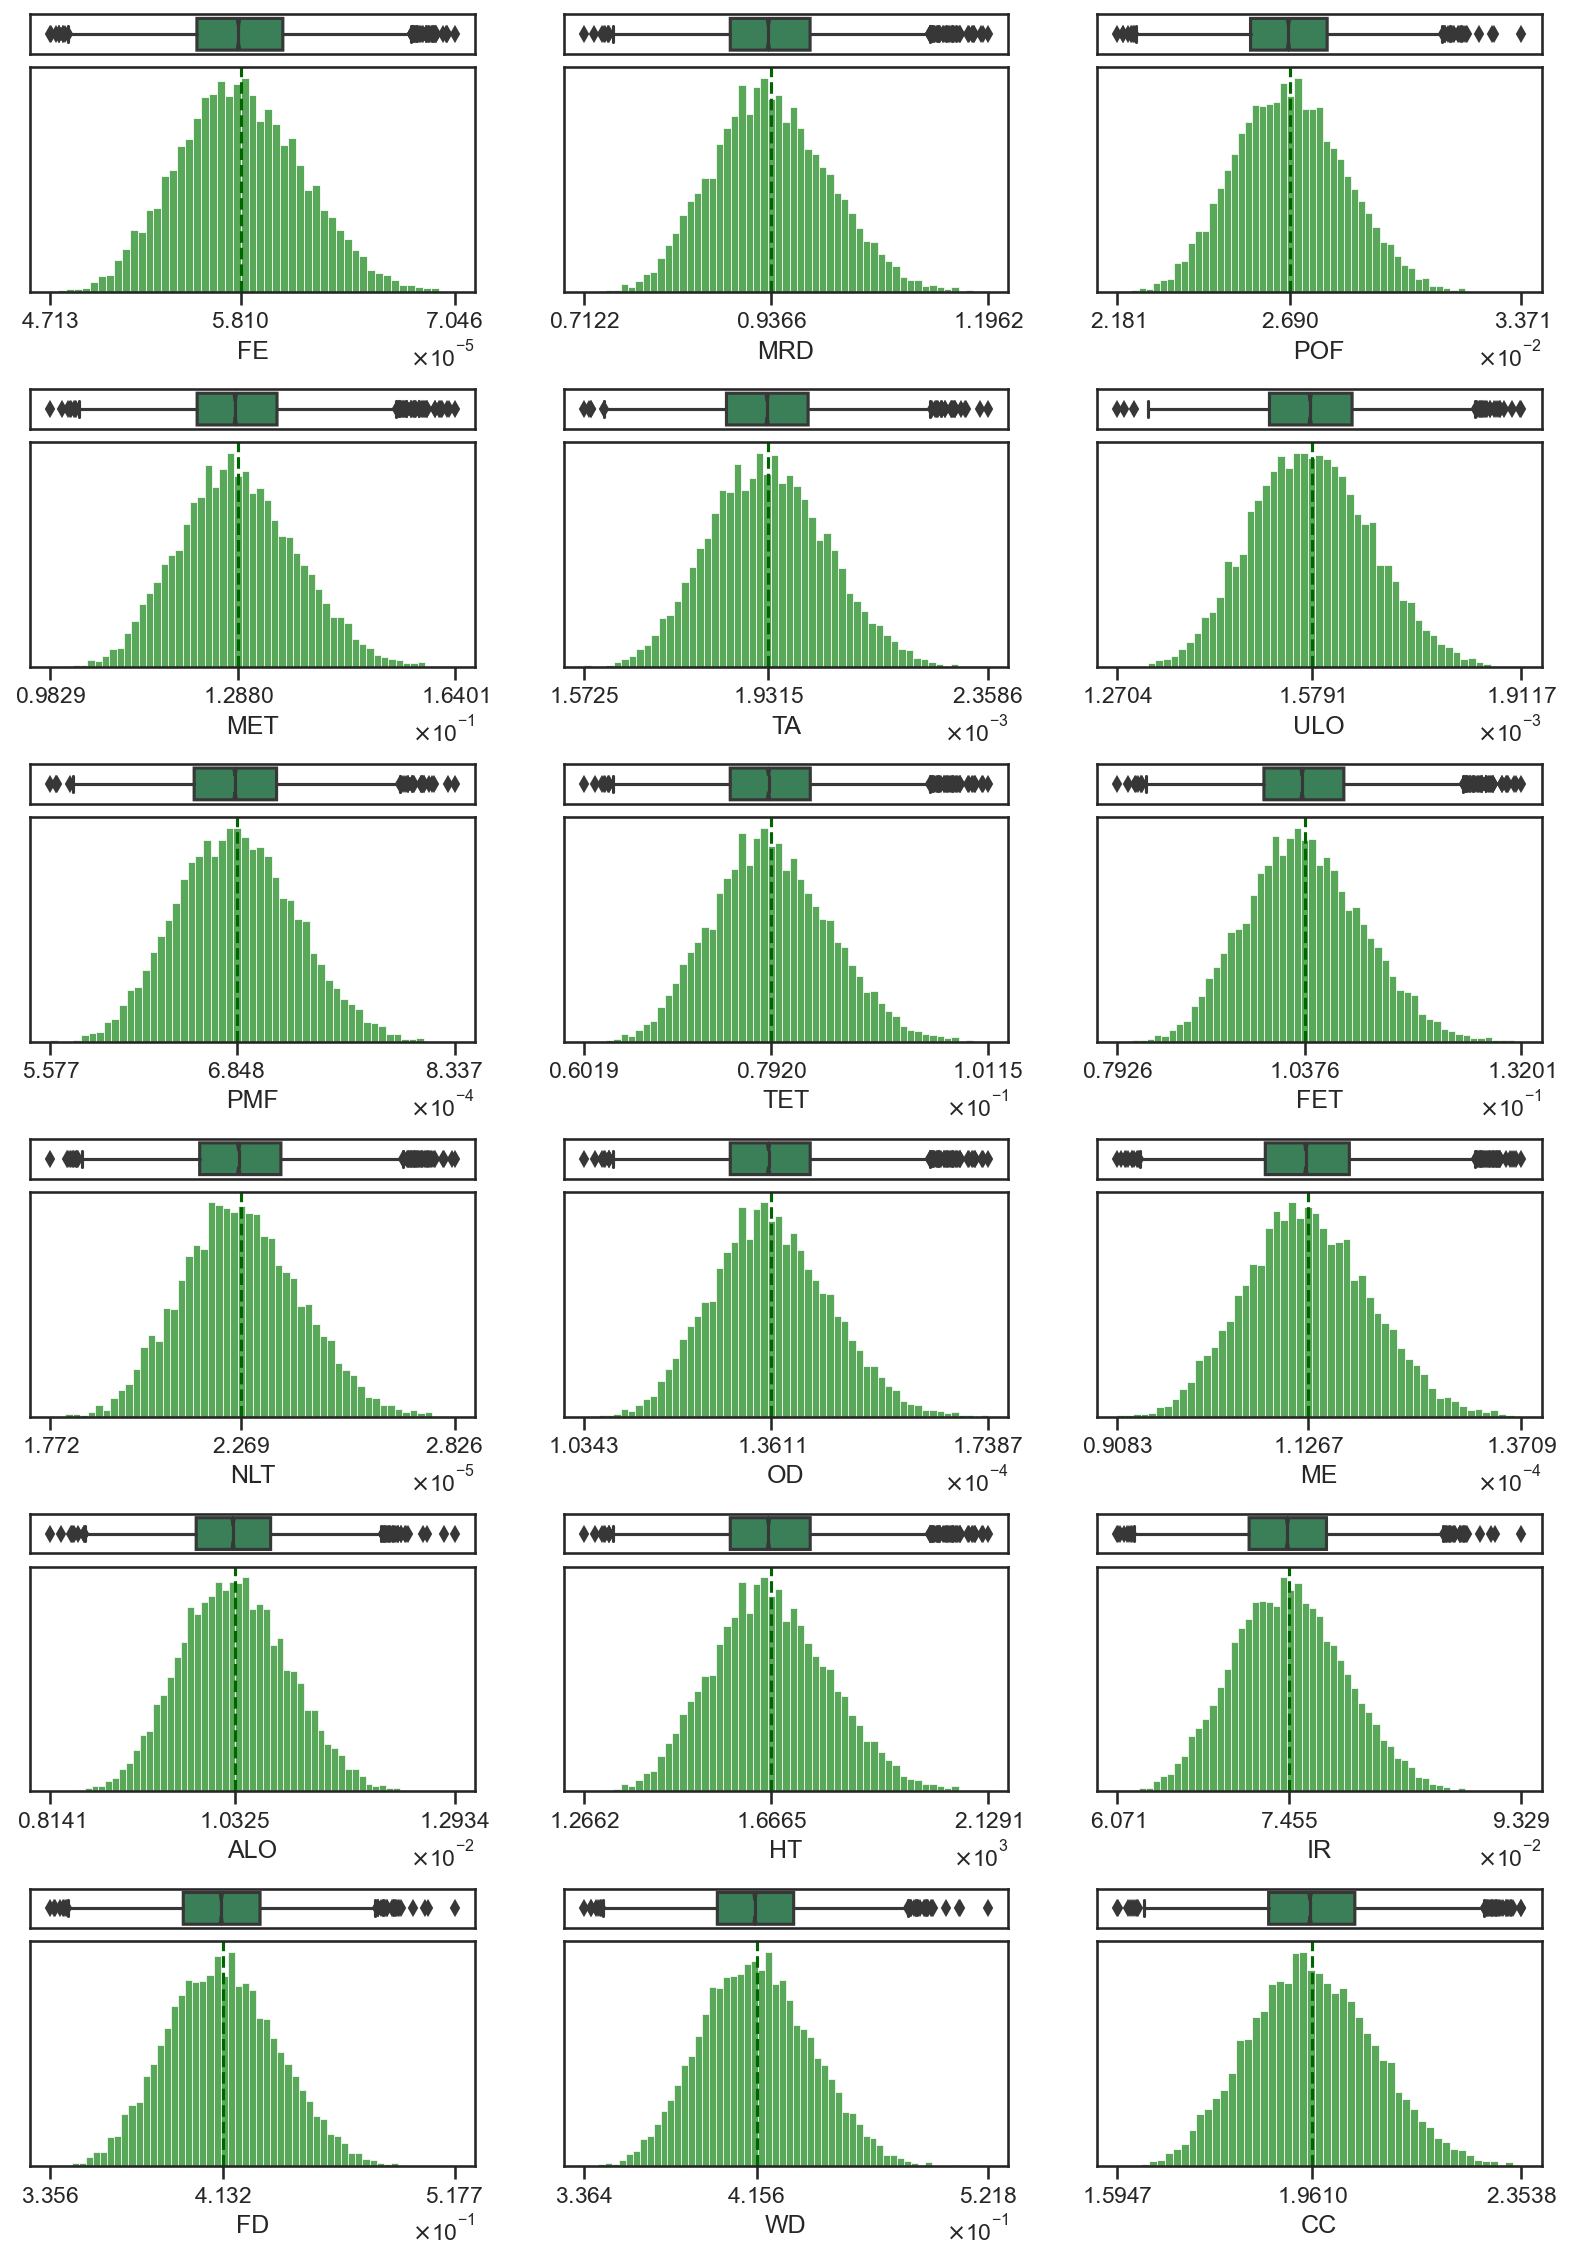

In [54]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

antera_no_pest.dist('MP', save=False)

Mean midpoint results are shown below.

In [46]:
iris_no_pest.mean('MP', by='sum').compute().to_pandas()

Categories
FE       0.000037
MRD      0.075202
POF      0.004408
MET      0.013282
TA       0.003382
ULO      0.001772
PMF      0.001232
TET      0.005871
FET      0.012008
NLT      0.000010
OD       0.000010
ME       0.000155
ALO      0.017787
HT     123.178845
IR       0.092287
FD       0.520283
WD       0.626020
CC       1.855203
dtype: float64

In [45]:
iris_pest.mean('MP', by='sum').compute().to_pandas()

Categories
FE          0.029488
MRD         0.623447
POF        31.994144
MET        46.337287
TA          0.412384
ULO         9.833967
PMF         0.125599
TET       501.646076
FET       250.972639
NLT         0.001604
OD          0.074571
ME          0.026169
ALO         3.919983
HT     386778.806053
IR          0.431085
FD          0.522619
WD         50.901339
CC       1065.036880
dtype: float64

Next, we calculate mean midpoint impacts per life cycle phase using the `LCIA.bar()` method.

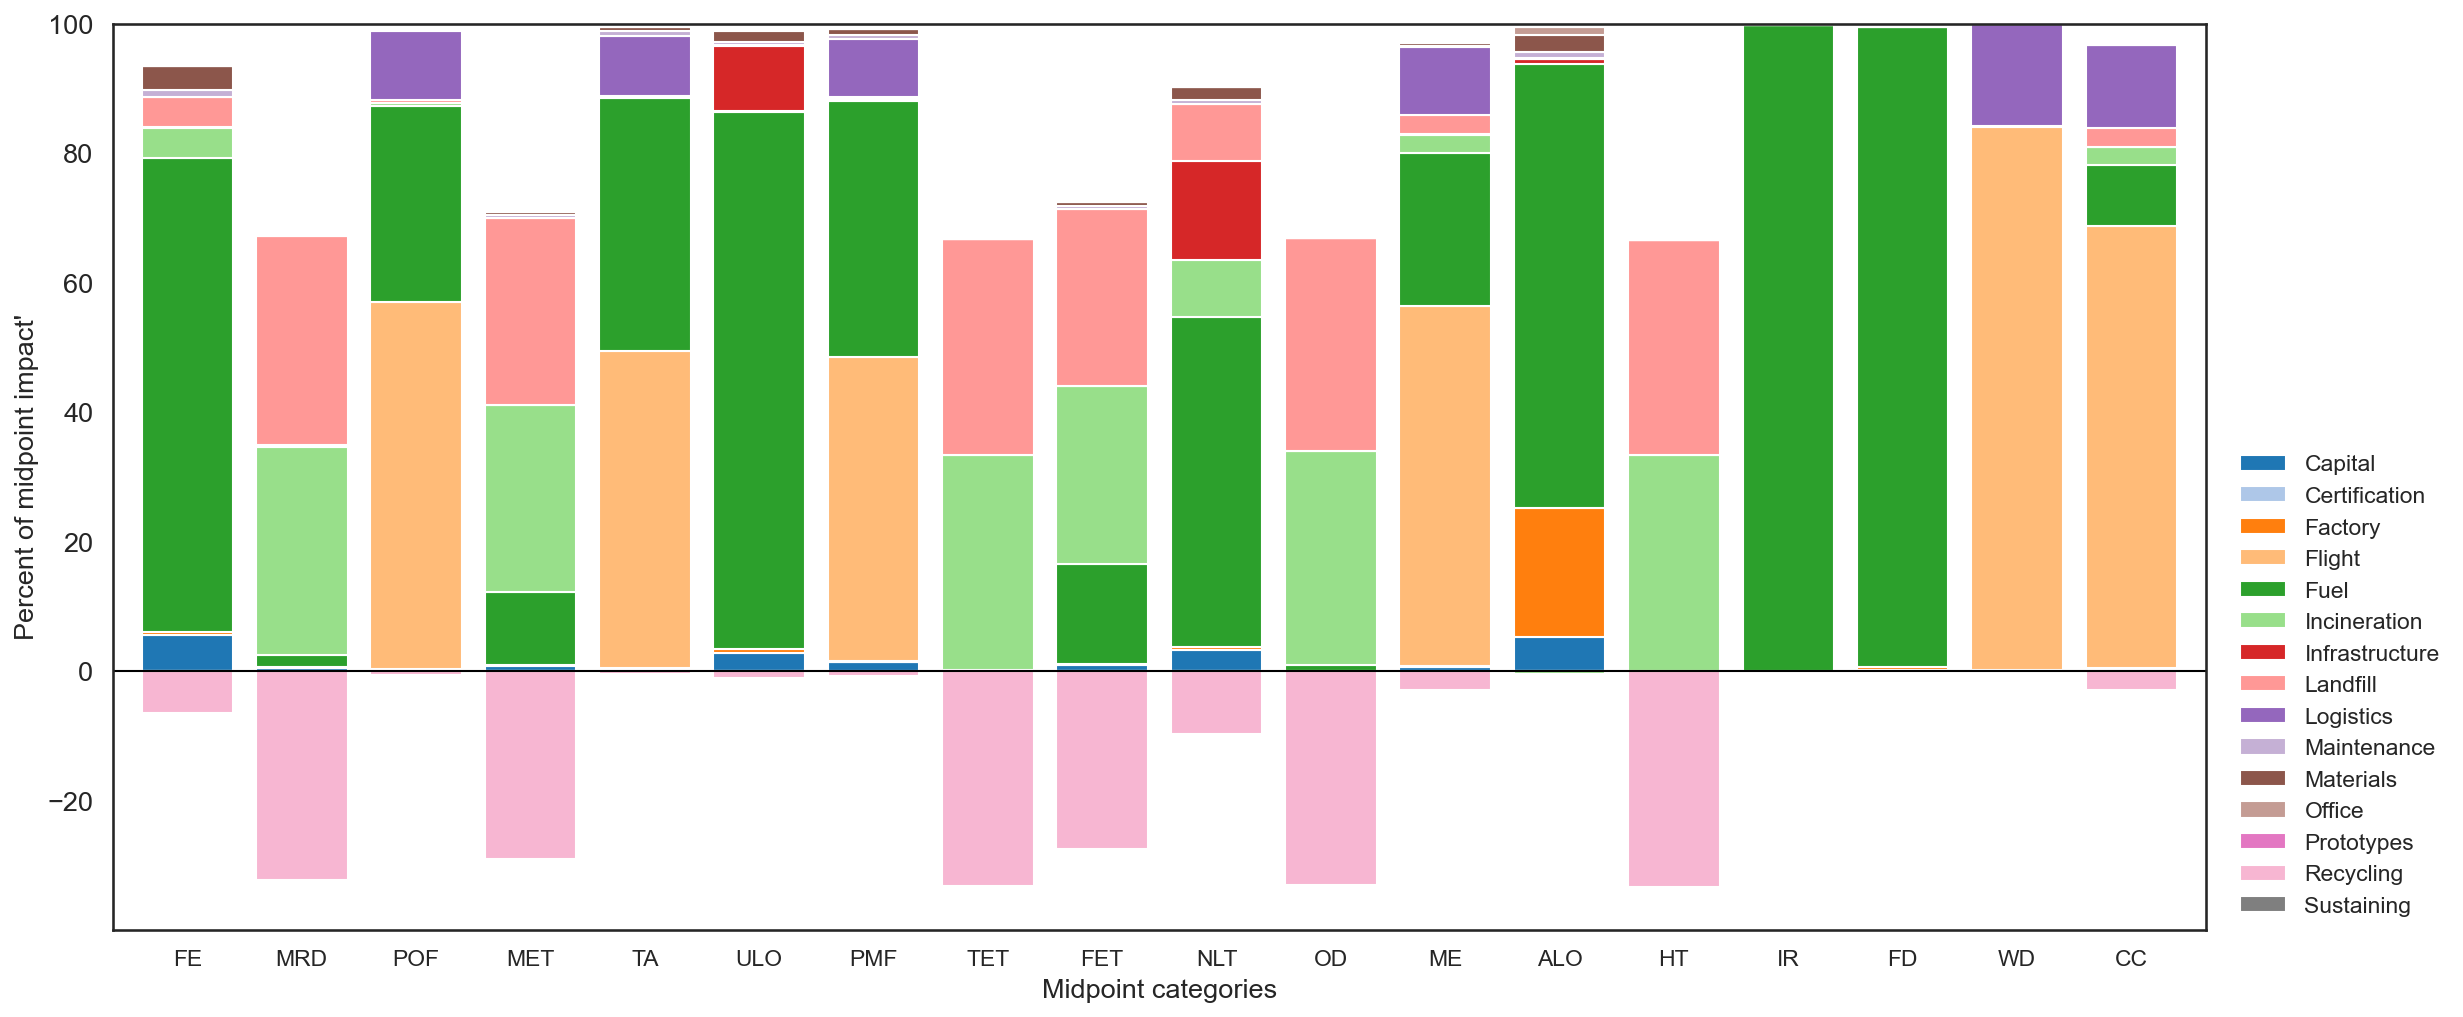

In [50]:
iris_no_pest.bar('MP', subphase=True, save=False, palette="tab20")

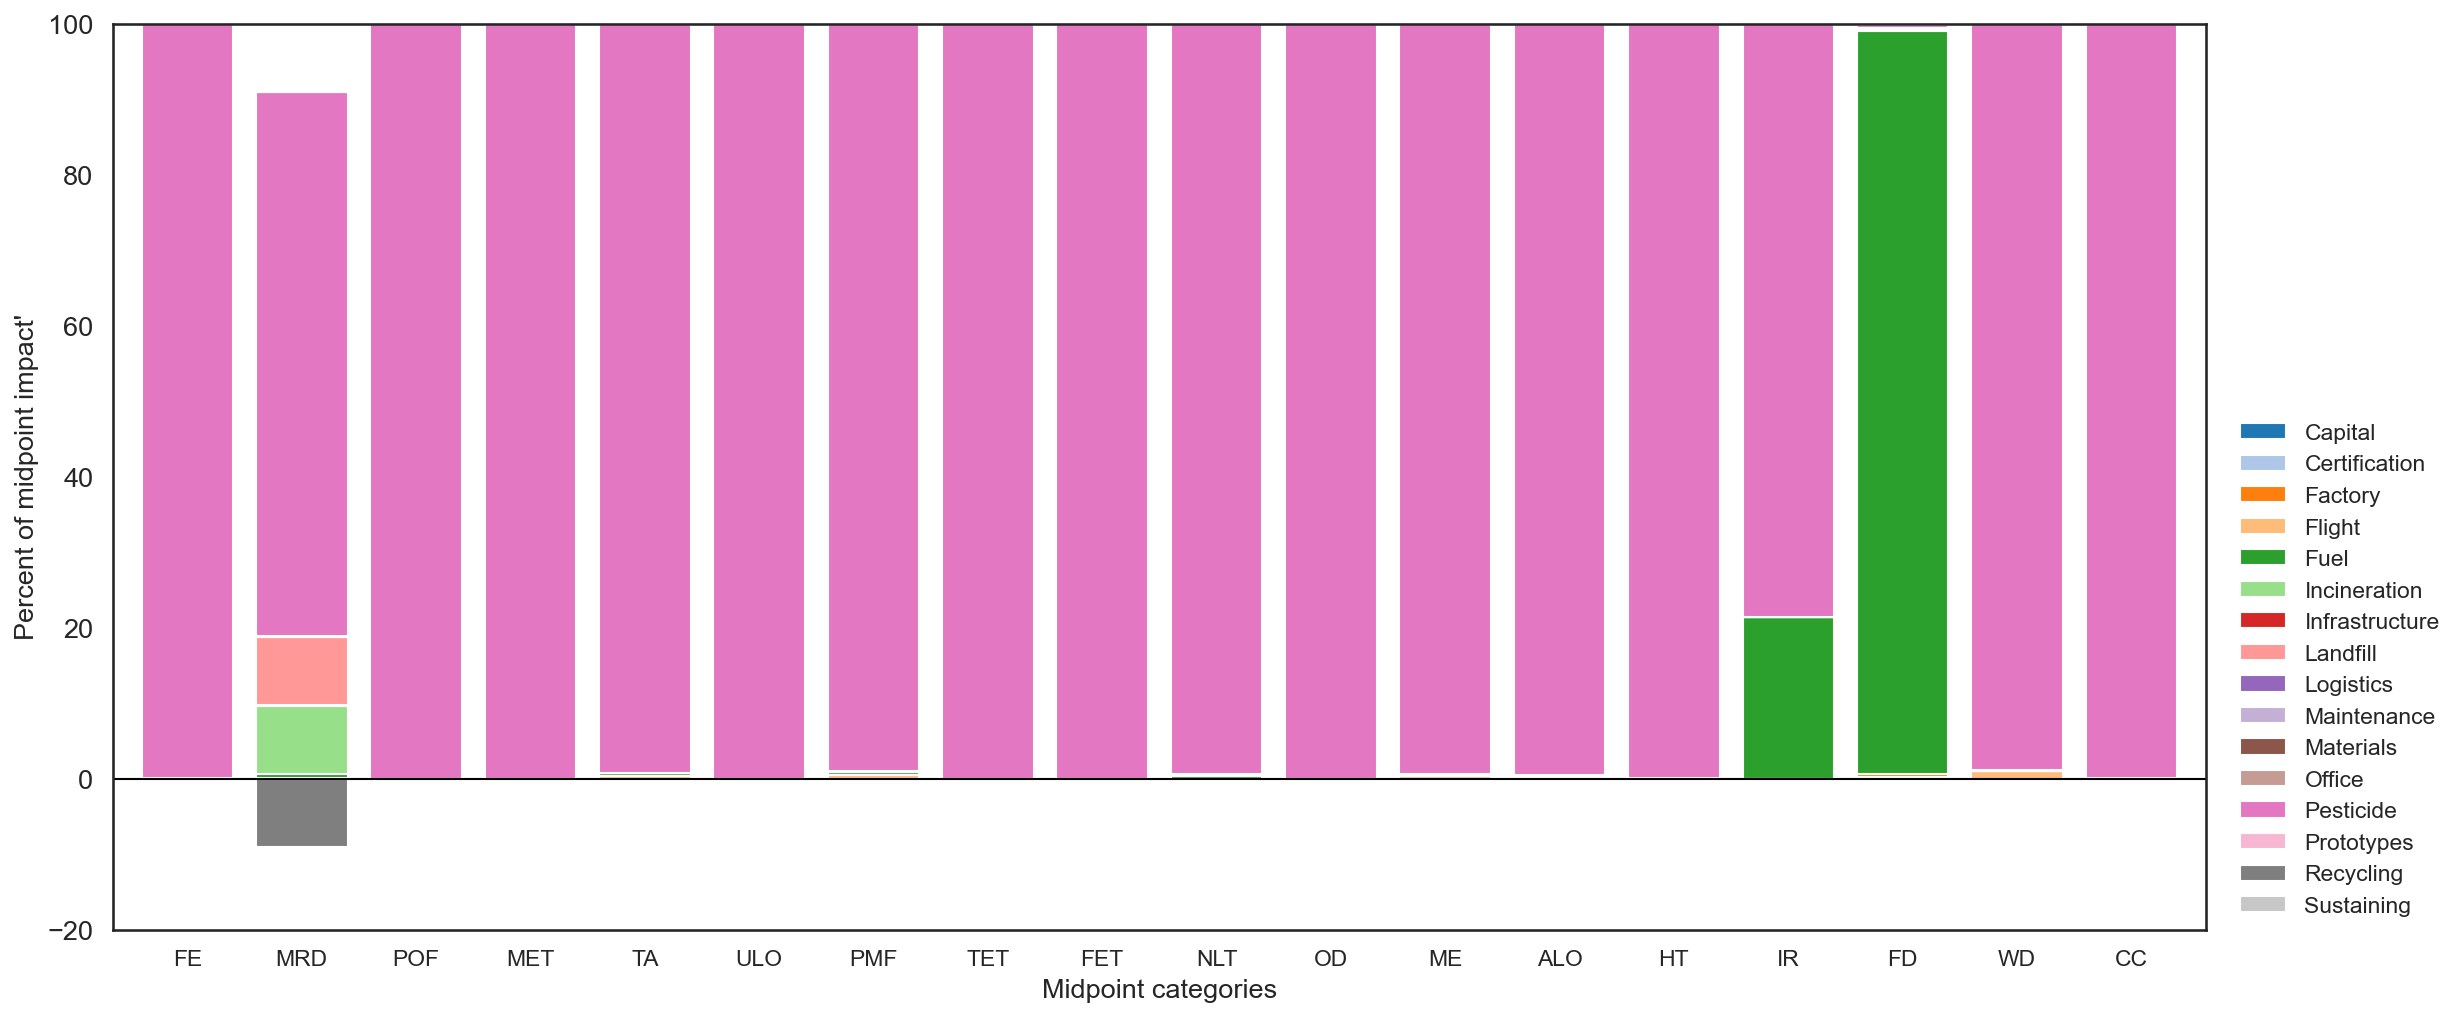

In [51]:
iris_pest.bar('MP', subphase=True, save=False, palette='tab20')

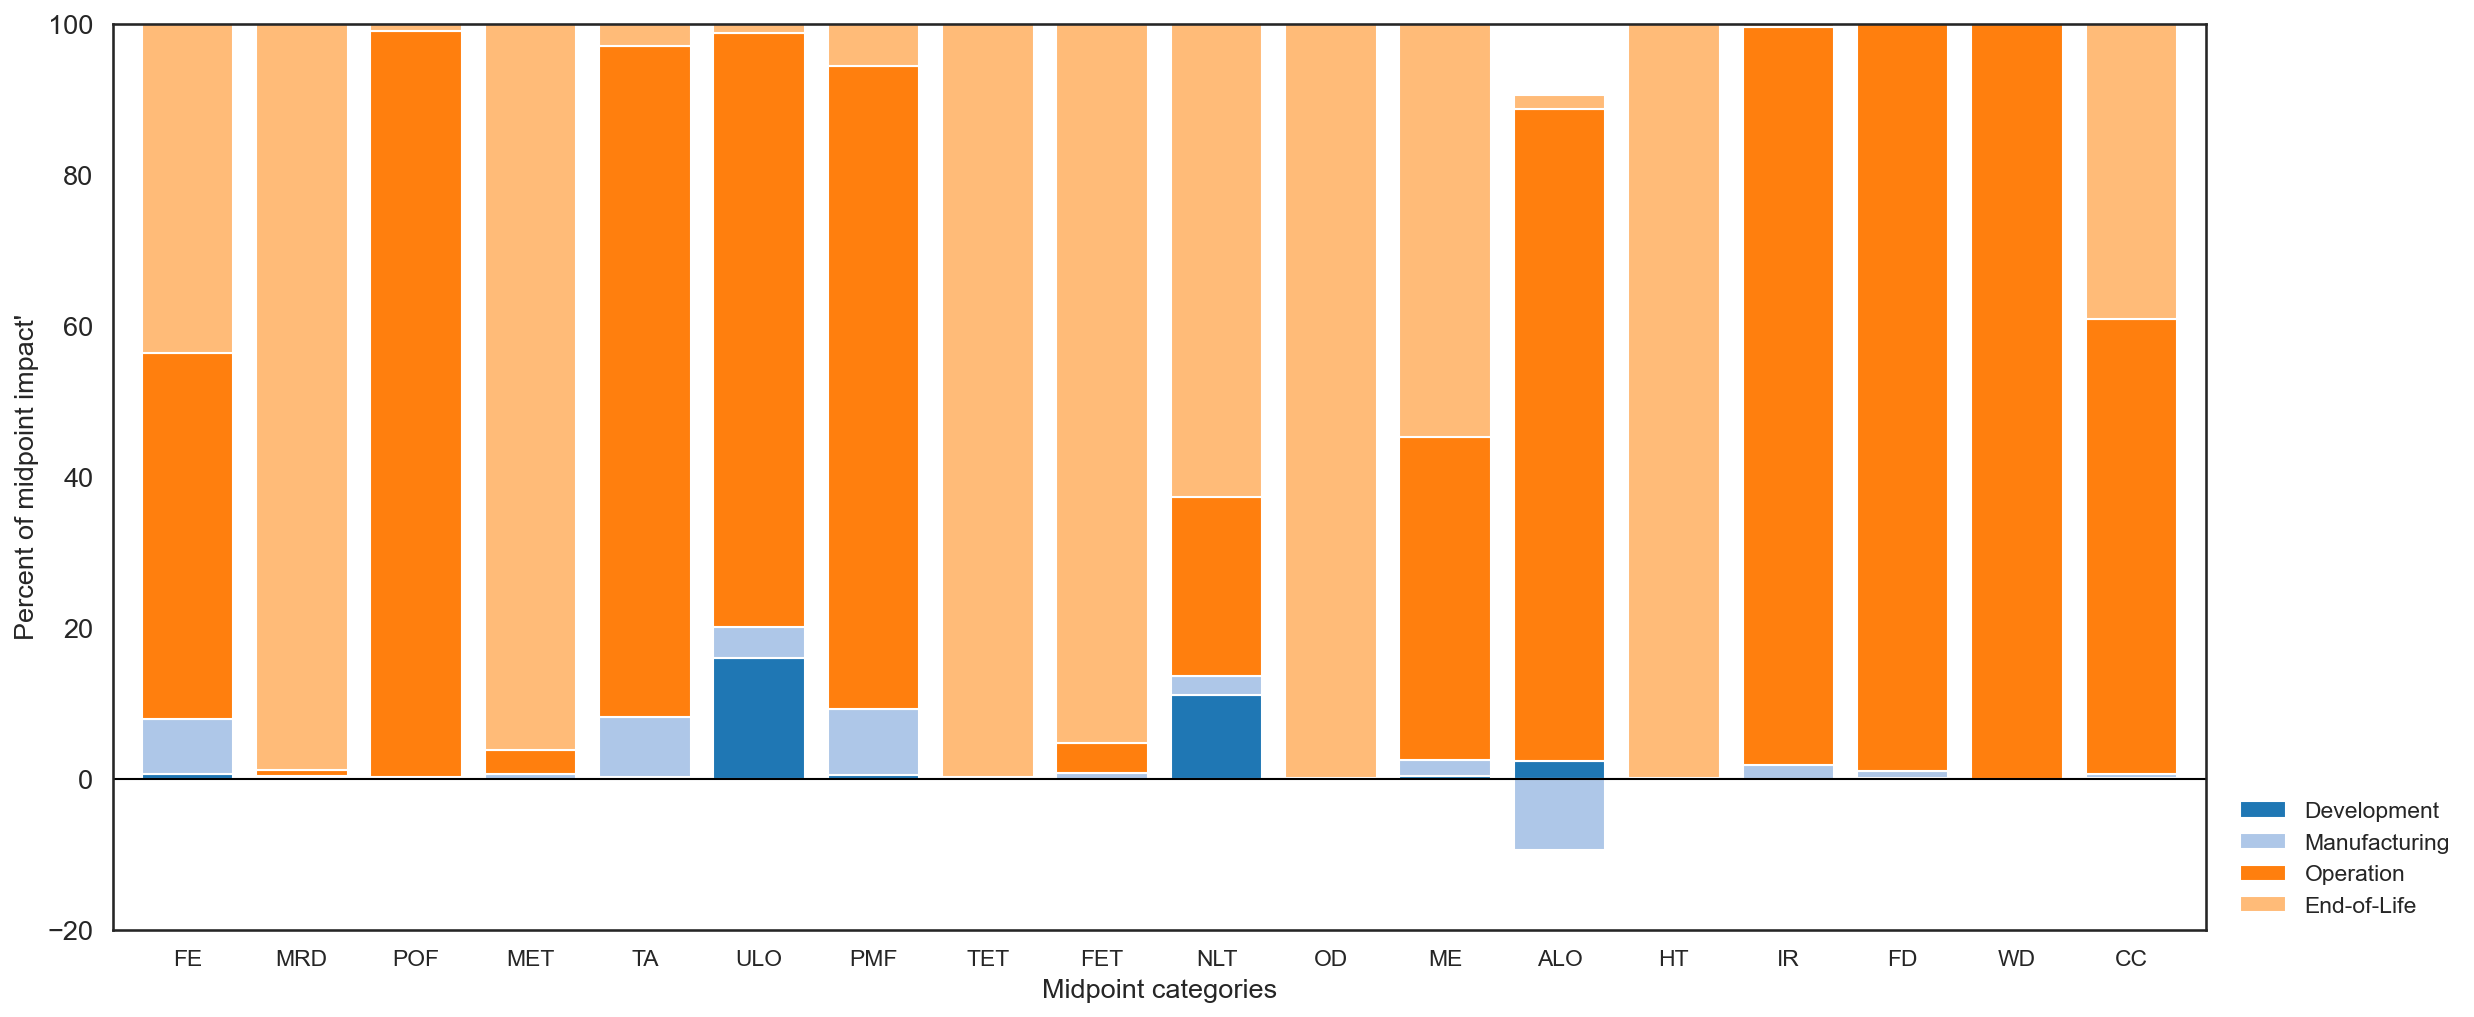

In [53]:
antera_no_pest.bar('MP', subphase=False, save=False, palette='tab20')

# Endpoint Results

The distributions of the endpoint results, considering all the iterations, are plotted for each impact category using the `LCIA.dist()` method.

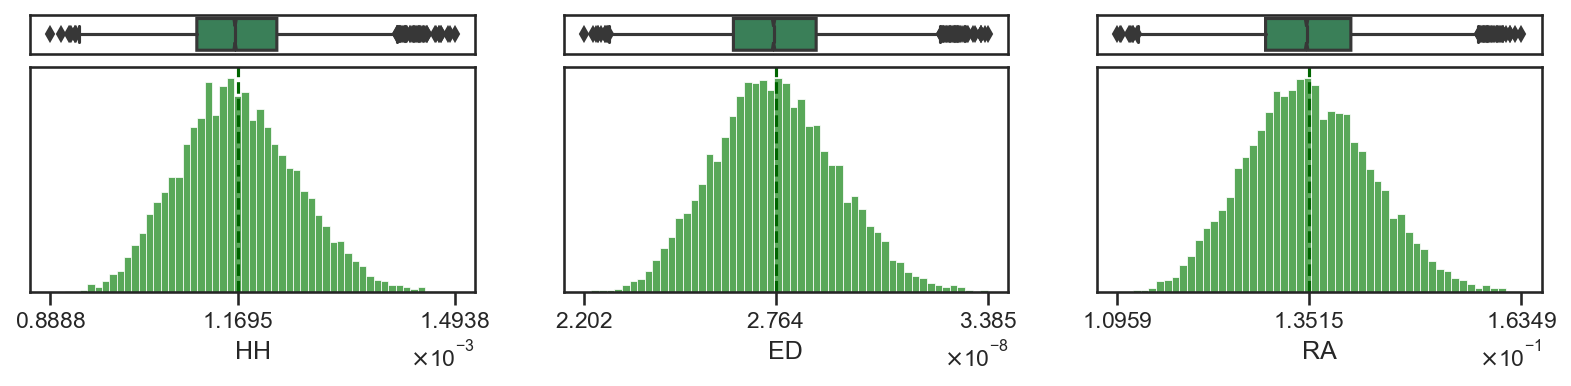

In [58]:
antera_no_pest.dist('EP', save=False)

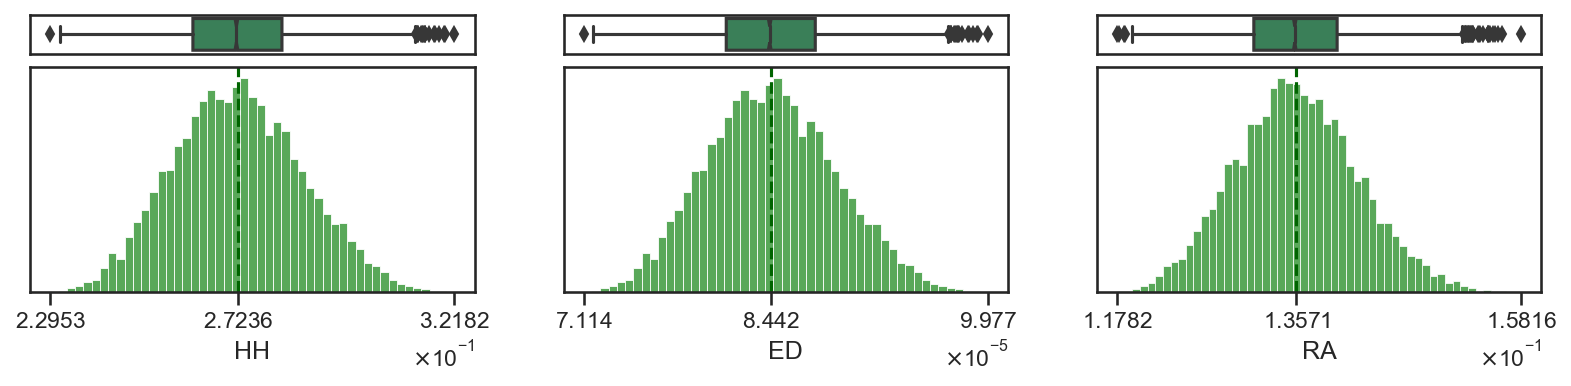

In [57]:
iris_pest.dist('EP', save=False)

Mean endpoint results are shown below.

In [62]:
antera_no_pest.mean('EP', by='sum').compute().to_pandas()

AOP
HH    1.169490e-03
ED    2.763550e-08
RA    1.351535e-01
dtype: float64

In [63]:
iris_no_pest.mean('EP', by='sum').compute().to_pandas()

AOP
HH    1.754480e-04
ED    1.697228e-08
RA    9.612049e-02
dtype: float64

Endpoint impacts per life cycle phase are plotted with the `LCIA.bar()` method.

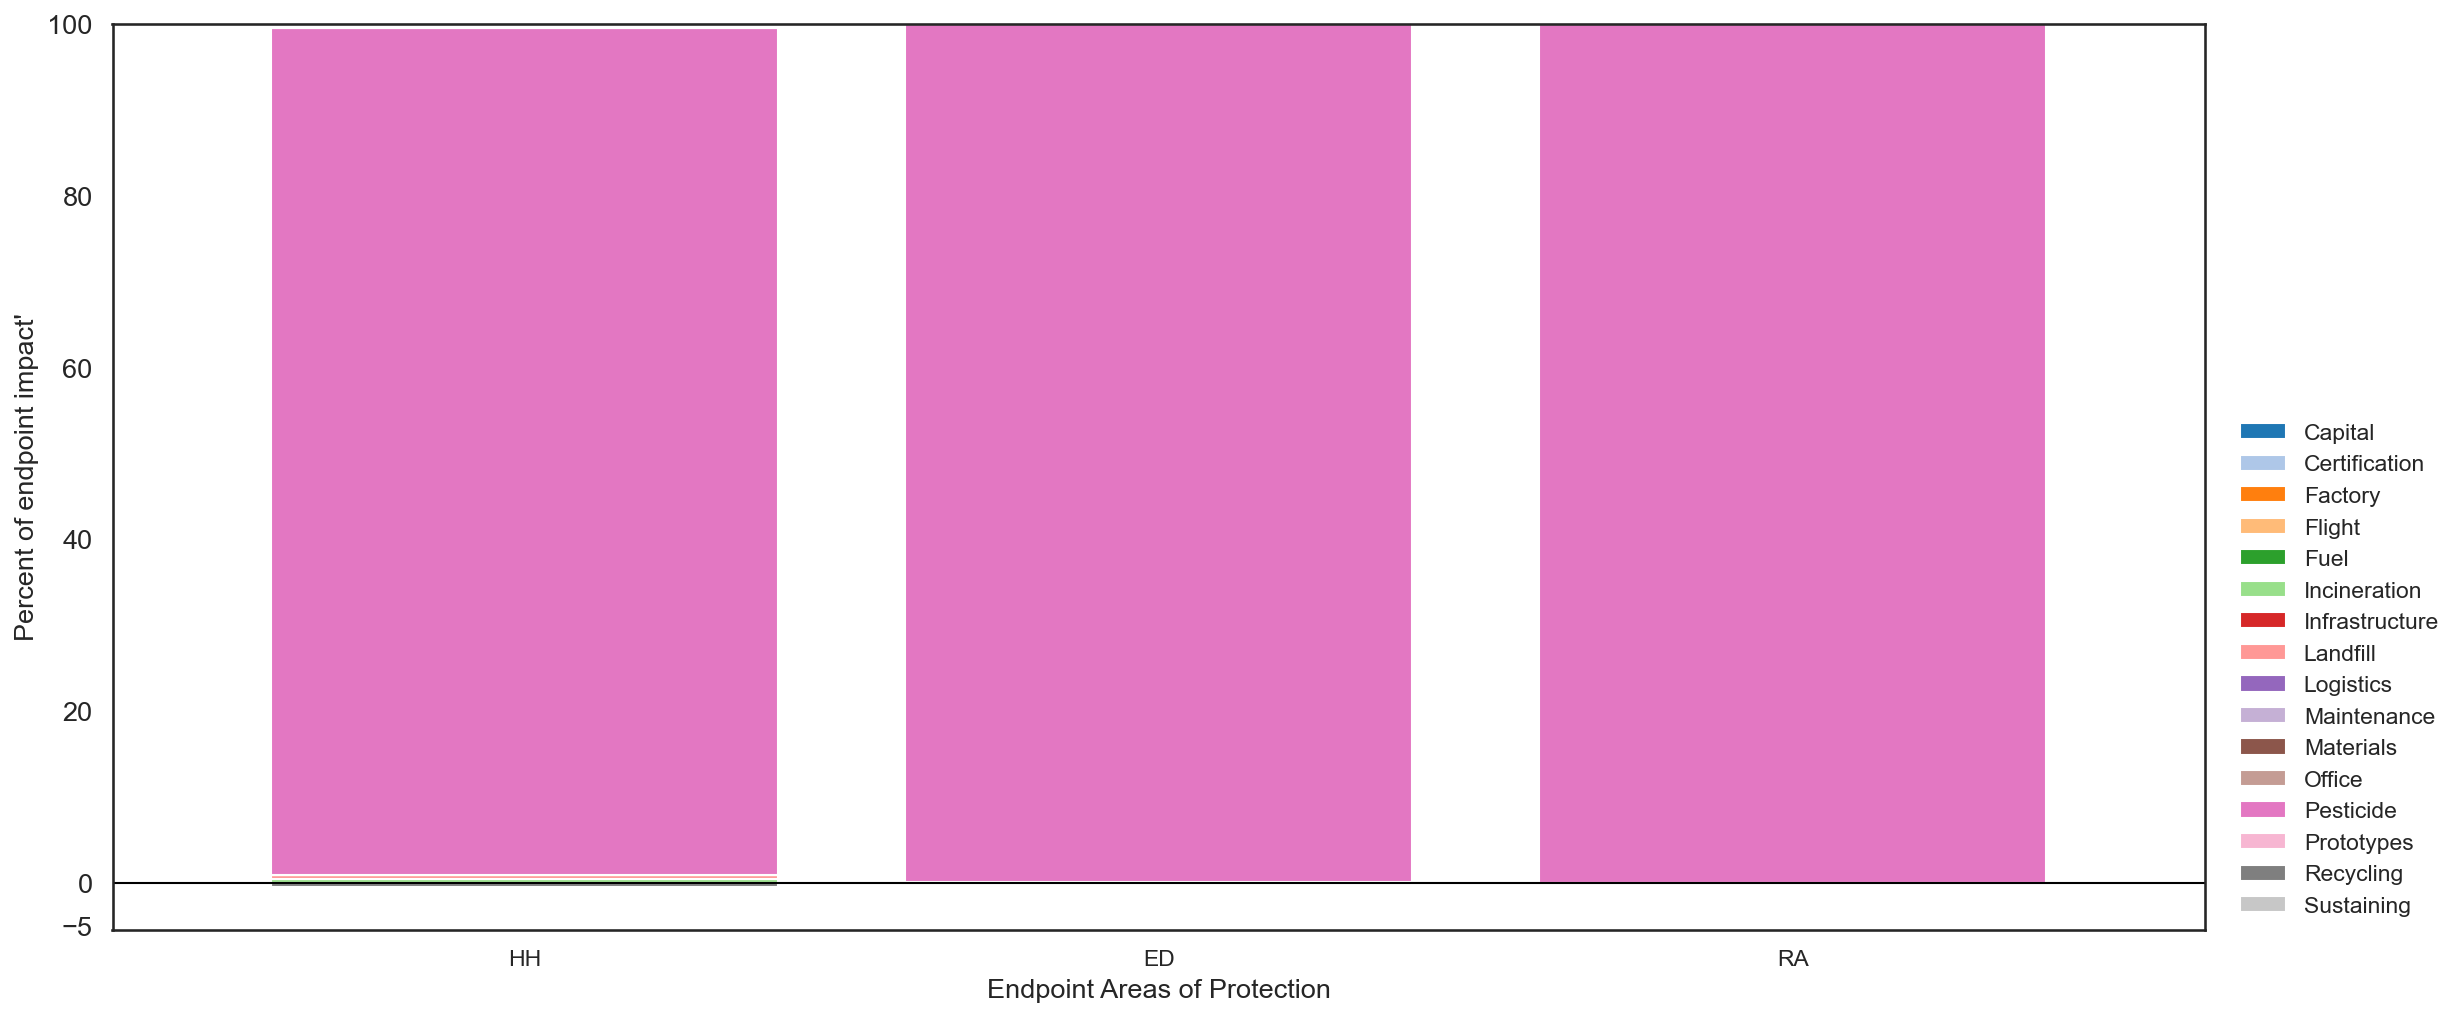

In [67]:
antera_pest.bar('EP', subphase=True, save=False, palette='tab20')

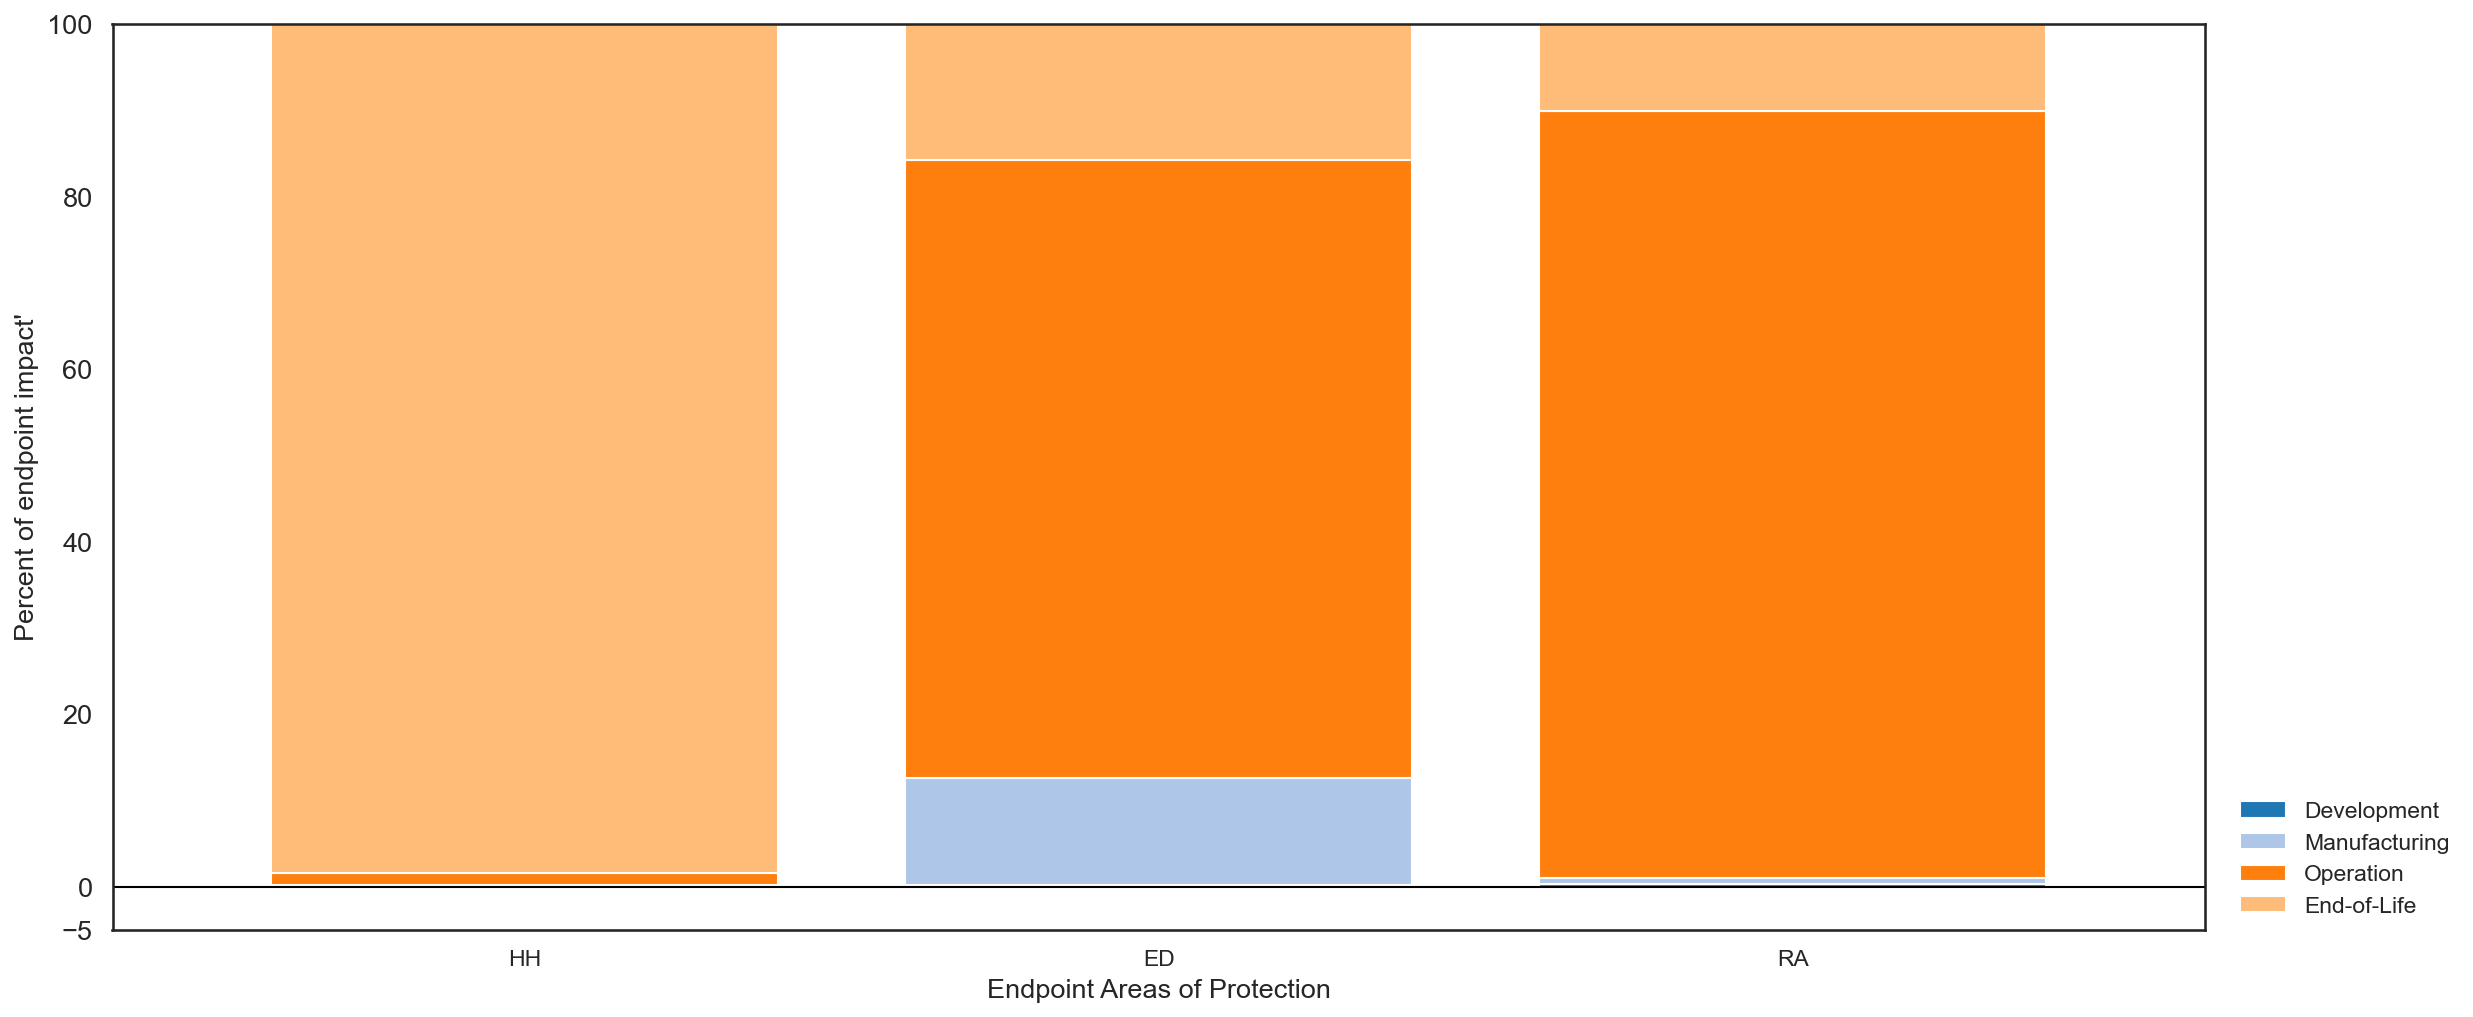

In [68]:
iris_no_pest.bar('EP', subphase=False, save=False, palette='tab20')

# Single Score Results

Mean SS results are shown below.

In [71]:
antera_pest.SS("sum").mean('i').compute()

<xarray.DataArray ()>
array(505391.36413411)

In [72]:
iris_pest.SS("sum").mean('i').compute()

<xarray.DataArray ()>
array(2.13571321)

# CTV Results

The areas in the following plots represent CTV for each input parameters. Each plot concerns one midpoint or endpoint result. This plot is accessed through the `LCIA.square()` method.

In [73]:
antera_pest.square(save=False)

TypeError: 'NoneType' object is not iterable

# Comparison

Comparison of two Datasets of LCIA results can be achieved by the `LCIA.compare` method, indicating the desired pathway.
In this paired comparison method, the iterations of the "Numerator" Dataset are divided by the "Denominator" Dataset, generating a Dataset of ratios. 

This new comparison Dataset has the same number of iterations than the original LCIA results Datasets, but, this time, each iteration represents a ratio.
Ratios less than one mean that the "Numerator" Dataset is advantageous, while ratios greater than one mean that the "Denominator" Dataset is favourable.
Using this logic, we can have an idea of which aircraft concept has fewer impacts by computing the mean of the iterations, using the `.mean('i')` or `.median('i')` command.

In [74]:
pee28_mp = antera_no_pest.compare(iris_no_pest, pathway="MP")
pee28_ep = antera_no_pest.compare(iris_no_pest, pathway="EP")

In [75]:
display(pee28_mp.compute().median('i'))
display(pee28_ep.compute().median('i'))

<xarray.Dataset>
Dimensions:  ()
Data variables: (12/18)
    FE       float64 1.565
    MRD      float64 55.27
    POF      float64 6.099
    MET      float64 15.44
    TA       float64 0.571
    ULO      float64 0.8914
    ...       ...
    ALO      float64 0.5801
    HT       float64 1.144e+04
    IR       float64 0.8076
    FD       float64 0.7942
    WD       float64 0.6638
    CC       float64 1.057

<xarray.Dataset>
Dimensions:  ()
Data variables:
    HH       float64 6.661
    ED       float64 1.627
    RA       float64 1.406

All Categories and all AOP have mean results slightly lower than one, meaning the Echo concept is slightly advantageous.

The same point can be proven by using the `comparePercent` function.
The function shows, in percentage, how many of the iterations are below the threshold of one, meaning how many iterations favour Echo over Bravo.

In [76]:
display(comparePercent(pee28_mp))
display(comparePercent(pee28_ep))

<xarray.Dataset>
Dimensions:  ()
Data variables: (12/18)
    FE       float64 0.0
    MRD      float64 0.0
    POF      float64 0.0
    MET      float64 0.0
    TA       float64 100.0
    ULO      float64 91.57
    ...       ...
    ALO      float64 100.0
    HT       float64 0.0
    IR       float64 99.61
    FD       float64 99.8
    WD       float64 100.0
    CC       float64 27.05
Attributes:
    Numerator:    Antera_spray
    Denominator:  Iris

<xarray.Dataset>
Dimensions:  ()
Data variables:
    HH       float64 0.0
    ED       float64 0.0
    RA       float64 0.0
Attributes:
    Numerator:    Antera_spray
    Denominator:  Iris

This can be better visualized using the `LCIA.dist_compare()` method, which plots the paired distribution of both concepts.

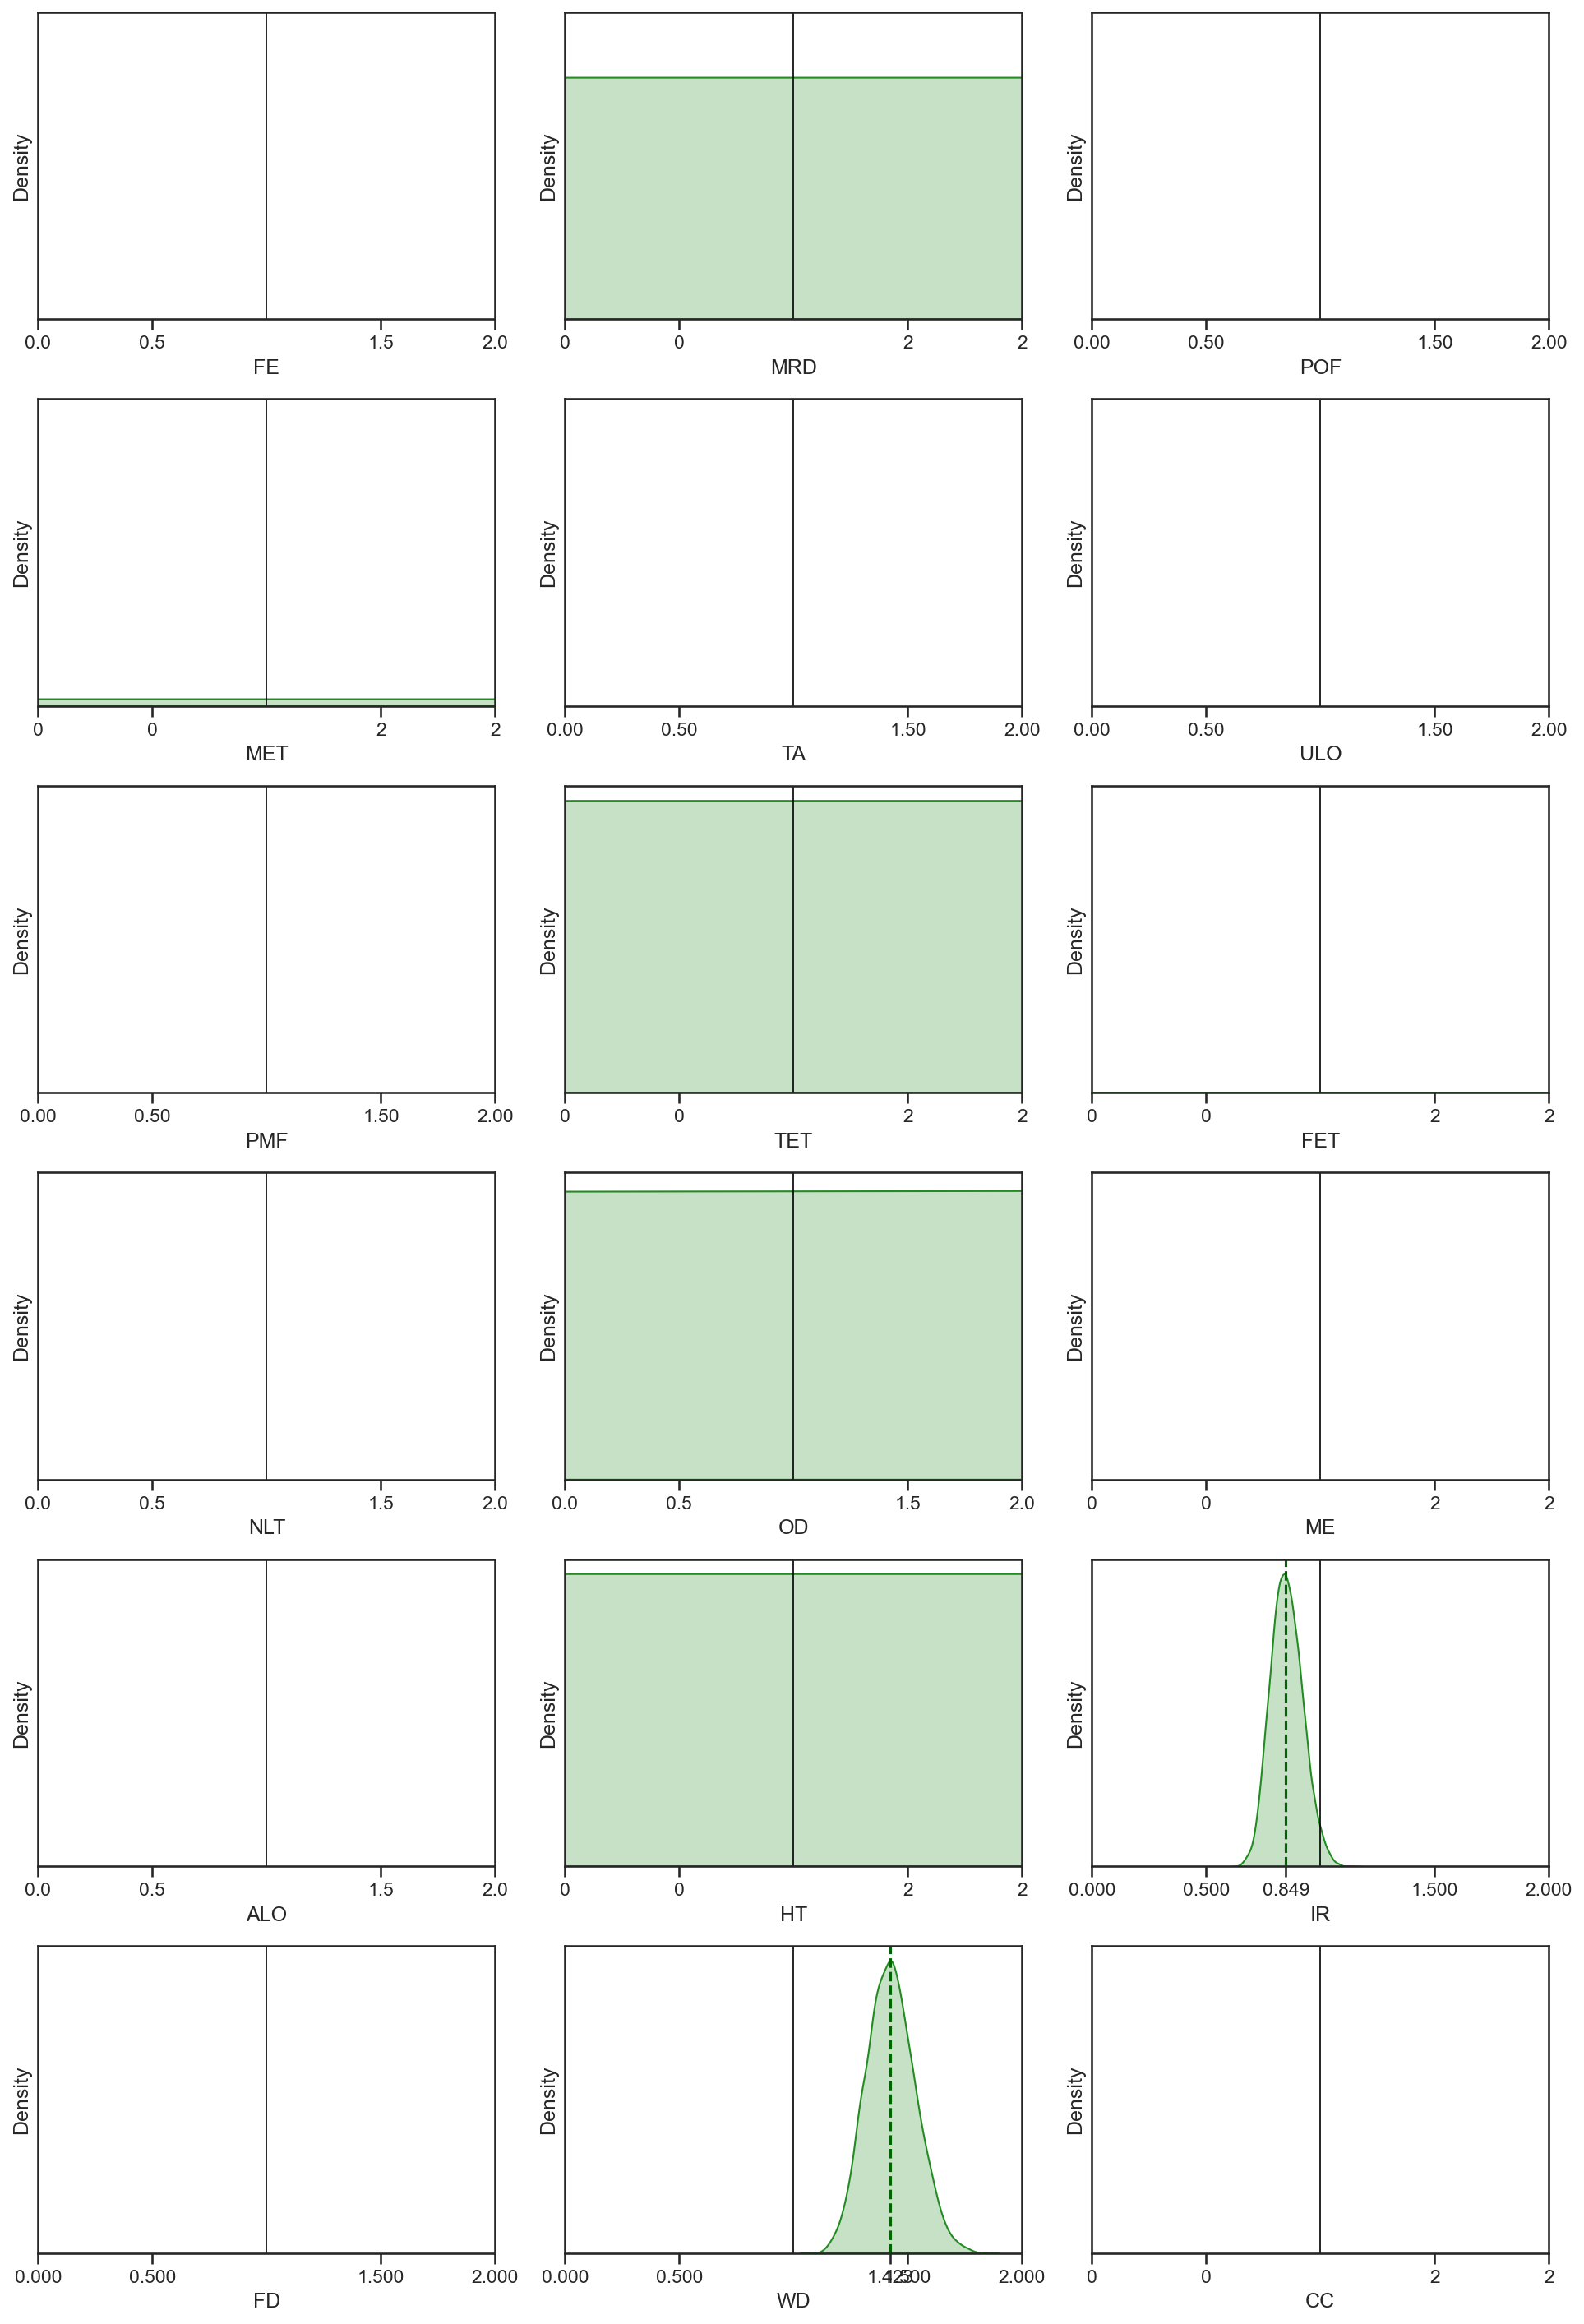

In [81]:
antera_pest.dist_compare(iris_no_pest, pathway='MP', save=True)

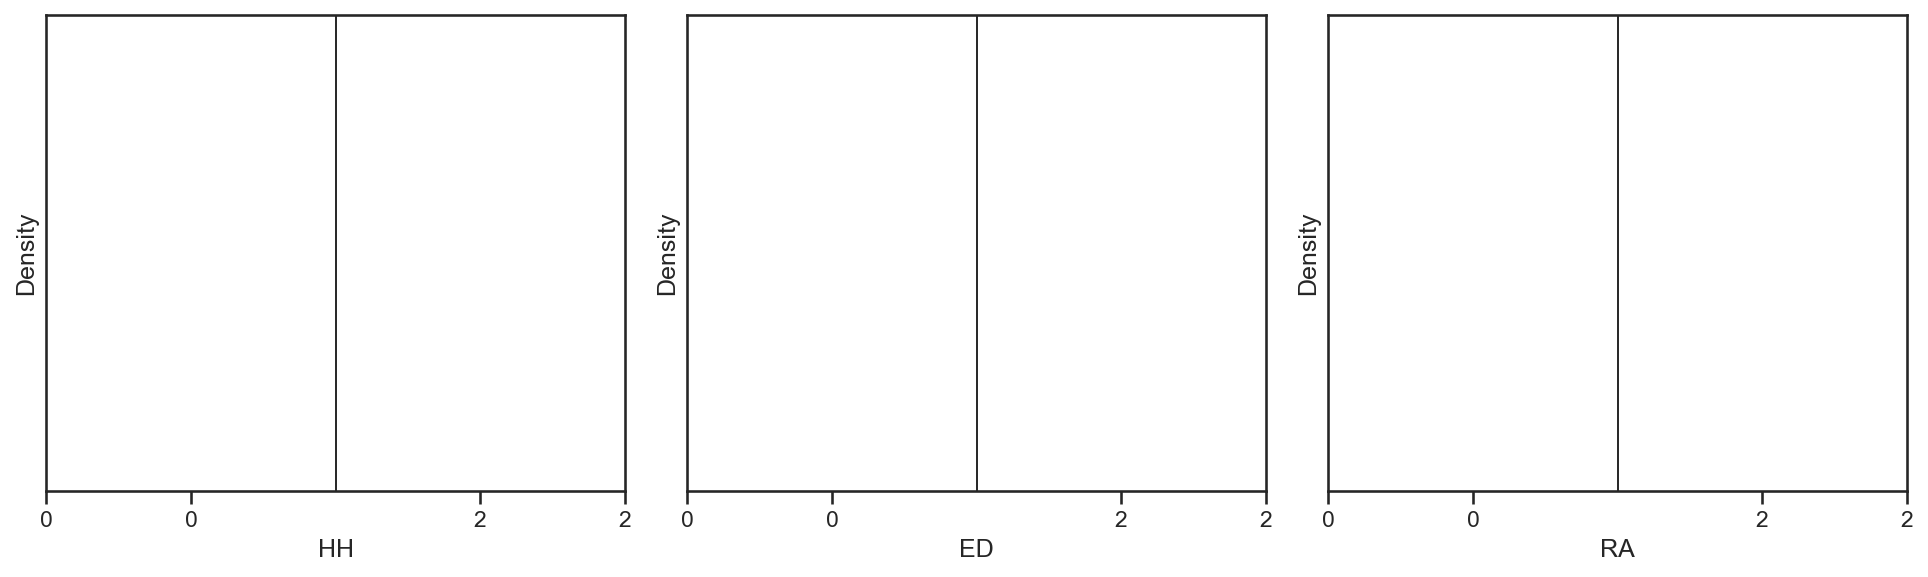

In [80]:
antera_pest.dist_compare(iris_no_pest, pathway='EP', save=True)